In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
trips = pd.read_csv('data/trips.csv')
trips

,activityid,personid,modechoice
0,1,3,WALK
1,2,3,WALK
2,3,3,WALK
3,4,3,WALK
4,5,3,WALK
...,...,...,...
14047024,17147588,4113994,DRIVE_ALONE_FREE
14047025,17147589,4113994,DRIVE_ALONE_FREE
14047026,17147590,4113994,DRIVE_ALONE_FREE
14047027,17147592,4113995,SHARED_3_HOV


In [3]:
utility = pd.read_csv('data/utilityvars.csv')
utility

,activityid,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,...,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,tourmode,firststop,laststop,zerototalstops,targettripmode
0,12150818,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,...,0.0,46.447229,46.447229,46.447229,0,5,True,False,False,1
1,3018709,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,...,0.0,495.225231,495.225231,495.225231,0,1,False,False,False,1
2,8809200,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,...,0.0,462.137117,462.137117,462.137117,0,1,False,False,True,1
3,11332534,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,...,0.0,342.291418,342.291418,342.291418,0,1,False,False,False,1
4,6130767,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,...,0.0,310.186071,310.186071,310.186071,0,1,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,10138525,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,...,0.0,842.672156,842.672156,842.672156,5,5,False,False,False,5
14047025,16270294,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,...,0.0,13.350623,13.350623,13.350623,5,3,False,False,False,3
14047026,16270295,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,...,0.0,137.377041,137.377041,137.377041,5,3,False,False,False,3
14047027,10138526,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,...,0.0,5.447711,5.447711,5.447711,5,5,False,False,False,3


## Exploratory Data Analysis

In [4]:
trips.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [5]:
utility.dtypes.unique()

array([dtype('int64'), dtype('bool'), dtype('float64')], dtype=object)

In [6]:
# check for problem features and missing data
for col in list(trips):
    print(col,':',trips[col].unique())

activityid : [       1        2        3 ... 17147590 17147592 17147593]
personid : [      3       4       5 ... 4113993 4113994 4113995]
modechoice : ['WALK' 'SHARED_2_HOV' 'DRIVE_ALONE_FREE' 'SCH_BUS' 'SHARED_3_HOV'
 'WALK_SET' 'BIKE' 'KNR_SET' 'PNR_SET' 'DRIVE_ALONE_PAY' 'SHARED_2_PAY'
 'SHARED_3_PAY']


In [7]:
# check for problem features and missing data
for col in list(utility):
    print(col,':',utility[col].unique())

activityid : [12150818  3018709  8809200 ... 16270295 10138526 10138527]
age : [4 6 7 2 3 1 0]
gender : [ True False]
autosuf : [2 1 0]
numhouseholdpersons : [ 2  6  1  3  4  5  7  8  9 10]
income : [4 1 3 2 5]
oduden : [ 9.63319969  8.3046999  10.18949986 ... 62.67900085 58.9233017
 31.80550003]
oempden : [  11.59405804   70.11791229   47.53874588 ...  658.33776855  254.5579834
 1974.05187988]
ototint : [ 4. 12.  3.  1.  2.  6. 13. 11. 10. 25. 23. 14.  9. 24. 22. 26. 15.  8.
 27.  5. 16.  7. 18. 20. 17. 21. 19.]
dempden : [  67.65913391   32.27333832   13.56715679 ...  254.5579834     6.26534557
 1974.05187988]
sovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
hovdrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tolldrivetime : [ 5.05331821 31.22618489 30.14556871 ...  1.40309007  1.17369234
 27.11808723]
tollcostsov : [  0.         160.26133728 201.02601624 ... 193.25448608 171.62652588
 214.60983276

<AxesSubplot:ylabel='Frequency'>

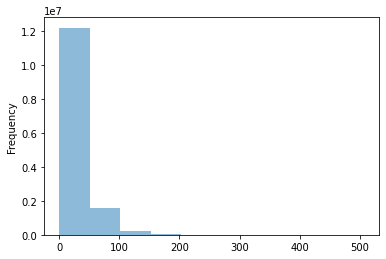

In [8]:
utility['walkttime'].plot.hist(bins=10, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

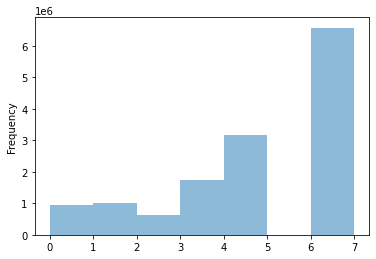

In [9]:
utility['age'].plot.hist(bins=7, alpha=0.5)

In [10]:
utility['age'].value_counts()
# we see that most people are aged 56+, followed by the age group between 25-55
# so we have little representation of the younger age group

7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64

In [11]:
# activityid can be removed because it just identifies each person, not relevant for our prediction

In [12]:
utility['gender'].value_counts()
# we have around 1.2 million more females than males 

True     7630493
False    6416536
Name: gender, dtype: int64

In [13]:
utility['autosuf'].value_counts()
# most common is unsufficient vehicle count, following sufficient count, and little households that don't have vehicle

1    7330371
2    6556605
0     160053
Name: autosuf, dtype: int64

In [14]:
utility['income'].value_counts()
# distribution of income seems relatively like normal distribution
# 3 is the average of $60-100k

3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64

<AxesSubplot:ylabel='Frequency'>

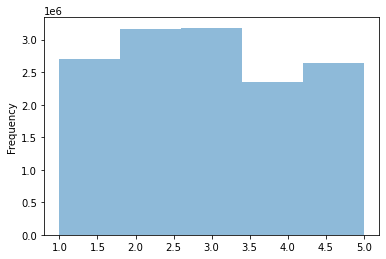

In [15]:
utility['income'].plot.hist(bins=5, alpha=0.5)

In [16]:
utility['tourpurpose'].value_counts()
# work, escort, discretionary are most common purposes of the tour
# university and work-based is the least common

0    3594540
5    3489898
4    2832591
2    1650401
3    1570662
7     425017
1     302898
6     181022
Name: tourpurpose, dtype: int64

<AxesSubplot:ylabel='Frequency'>

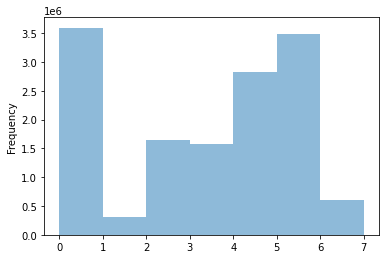

In [17]:
utility['tourpurpose'].plot.hist(bins=7, alpha=0.5)

In [18]:
utility['tourmode'].value_counts()
# driving is the most common tour modes, with park and ride and kiss and ride are least common

1     4999579
3     3891056
5     3759115
7      842413
9      235085
12     137256
8      107159
11      57661
10      17705
Name: tourmode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

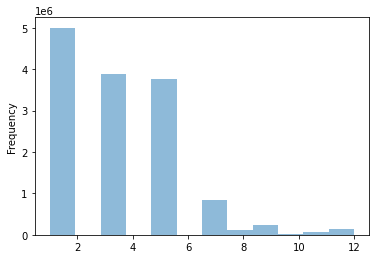

In [19]:
utility['tourmode'].plot.hist(bins=12, alpha=0.5)

In [20]:
utility['targettripmode'].value_counts()

1     6155225
3     3523141
5     2831163
7     1003774
9      213502
12     137256
8      107159
11      24315
2       20494
6       11328
10      10074
4        9598
Name: targettripmode, dtype: int64

<AxesSubplot:ylabel='Frequency'>

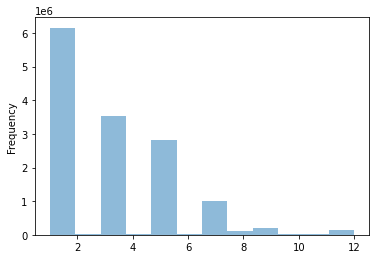

In [21]:
utility['targettripmode'].plot.hist(bins=12, alpha=0.5)

## Data Cleaning

In [4]:
# drop columns with no significant values (e.g. only 1 value, only unique values)
# dropped tourmode due to high correlation
utility = utility.drop(columns=['activityid', 'tourmode'])
utility

,age,gender,autosuf,numhouseholdpersons,income,oduden,oempden,ototint,dempden,sovdrivetime,...,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,tourpurpose,firststop,laststop,zerototalstops,targettripmode
0,4,True,2,2,4,9.633200,11.594058,4.0,67.659134,5.053318,...,0.0,0.0,46.447229,46.447229,46.447229,0,True,False,False,1
1,6,False,2,2,1,8.304700,70.117912,12.0,32.273338,31.226185,...,0.0,0.0,495.225231,495.225231,495.225231,0,False,False,False,1
2,6,False,2,6,3,10.189500,47.538746,3.0,13.567157,30.145569,...,0.0,0.0,462.137117,462.137117,462.137117,0,False,False,True,1
3,4,False,2,1,2,13.393200,21.983759,4.0,51.544109,24.318232,...,0.0,0.0,342.291418,342.291418,342.291418,0,False,False,False,1
4,6,False,2,3,2,13.274000,6.568953,3.0,8.480003,25.267041,...,0.0,0.0,310.186071,310.186071,310.186071,0,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,2,True,2,4,2,35.460899,286.328949,14.0,12.385718,56.546418,...,0.0,0.0,842.672156,842.672156,842.672156,5,False,False,False,5
14047025,7,False,2,4,3,17.207199,19.868286,13.0,1.423494,1.403090,...,0.0,0.0,13.350623,13.350623,13.350623,5,False,False,False,3
14047026,7,False,2,4,3,16.574200,1.423494,13.0,88.151642,12.287907,...,0.0,0.0,137.377041,137.377041,137.377041,5,False,False,False,3
14047027,2,True,2,4,2,22.916100,12.385718,14.0,8.472905,1.173692,...,0.0,0.0,5.447711,5.447711,5.447711,5,False,False,False,3


In [5]:
# define categorical variables
utility['gender'] = np.where(utility['gender'] == True, 'female', 'male')

utility['autosuf'] = np.where(utility['autosuf'] == 0, 'no_vehicles', 
                                np.where(utility['autosuf'] == 1, 'insufficient', 'sufficient'))

utility['tourpurpose'] = np.where(utility['tourpurpose'] == 0, 'work', \
                                    np.where(utility['tourpurpose'] == 1, 'university', \
                                    np.where(utility['tourpurpose'] == 2, 'school', \
                                    np.where(utility['tourpurpose'] == 3, 'maintenance', \
                                    np.where(utility['tourpurpose'] == 4, 'escort', \
                                    np.where(utility['tourpurpose'] == 5, 'discretionary', \
                                    np.where(utility['tourpurpose'] == 6, 'work-based', 'cross-border')))))))
                                    
    
# utility['tourmode'] = np.where(utility['tourmode'] == 1, 'drive_alone_free', \
#                                 np.where(utility['tourmode'] == 3, 'hov2',\
#                                 np.where(utility['tourmode'] == 5, 'hov3',\
#                                 np.where(utility['tourmode'] == 7, 'walk',\
#                                 np.where(utility['tourmode'] == 8, 'bike',\
#                                 np.where(utility['tourmode'] == 9, 'walk_to_transit',\
#                                 np.where(utility['tourmode'] == 10, 'park_ride',\
#                                 np.where(utility['tourmode'] == 11, 'kiss_ride','school_bus'))))))))

# utility['targettripmode'] = np.where(utility['targettripmode'] == 1, 'drive_alone_free', \
#                                 np.where(utility['targettripmode'] == 2, 'drive_alone_pay',\
#                                 np.where(utility['targettripmode'] == 3, 'hov2_free',\
#                                 np.where(utility['targettripmode'] == 4, 'hov2_pay',\
#                                 np.where(utility['targettripmode'] == 5, 'hov3_free',\
#                                 np.where(utility['targettripmode'] == 6, 'hov3_pay',\
#                                 np.where(utility['targettripmode'] == 7, 'walk',\
#                                 np.where(utility['targettripmode'] == 8, 'bike',\
#                                 np.where(utility['targettripmode'] == 9, 'walk_to_transit',\
#                                 np.where(utility['targettripmode'] == 10, 'park_ride',\
#                                 np.where(utility['targettripmode'] == 11, 'kiss_ride','school_bus')))))))))))

In [6]:
utility.dtypes

age                        int64
gender                    object
autosuf                   object
numhouseholdpersons        int64
income                     int64
oduden                   float64
oempden                  float64
ototint                  float64
dempden                  float64
sovdrivetime             float64
hovdrivetime             float64
tolldrivetime            float64
tollcostsov              float64
tollcosthov2             float64
tollcosthov3             float64
walkttime                float64
walktotransitutility     float64
drivetotransitutility    float64
parkingcost              float64
parkingwalktime          float64
sovcost                  float64
hovcost                  float64
tollcost                 float64
tourpurpose               object
firststop                   bool
laststop                    bool
zerototalstops              bool
targettripmode             int64
dtype: object

In [7]:
for col in list(utility):
    print(col,':',utility[col].value_counts())

age : 7    3754099
4    3165495
6    2818493
3    1743774
1     994808
0     955376
2     614984
Name: age, dtype: int64
gender : female    7630493
male      6416536
Name: gender, dtype: int64
autosuf : insufficient    7330371
sufficient      6556605
no_vehicles      160053
Name: autosuf, dtype: int64
numhouseholdpersons : 2     3478939
4     2840701
3     2466820
5     1917514
1     1273335
6     1135600
8      569690
9      262962
7       90472
10      10996
Name: numhouseholdpersons, dtype: int64
income : 3    3182876
2    3170265
1    2701888
5    2643779
4    2348221
Name: income, dtype: int64
oduden : 5.558900     81383
10.986600    48101
3.956300     44700
7.538500     42778
2.540700     29732
             ...  
40.804199        1
35.840401        1
15.664600        1
0.013700         1
49.155701        1
Name: oduden, Length: 20621, dtype: int64
oempden : 10.919112       81383
43.163792       48101
23979.982422    44700
35.341751       42619
144.660065      29732
              

In [8]:
# define response, categorical, and numerical variables 
Y = utility['targettripmode'] - 1

X1 = utility.select_dtypes(include=['object','bool'])
X2 = utility.select_dtypes(exclude=['object','bool']).drop(columns='targettripmode')
Y

0           0
1           0
2           0
3           0
4           0
           ..
14047024    4
14047025    2
14047026    2
14047027    2
14047028    4
Name: targettripmode, Length: 14047029, dtype: int64

In [9]:
# show table with expanded categorical columns
expanded_data = []

for col in X1.columns:
    dummies = pd.get_dummies(X1[col], prefix=col)
    expanded_data.append(dummies)

expanded_data = pd.concat(expanded_data, axis=1)
expanded_data

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,tourpurpose_university,tourpurpose_work,tourpurpose_work-based,firststop_False,firststop_True,laststop_False,laststop_True,zerototalstops_False,zerototalstops_True
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047025,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047026,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
14047027,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0


In [10]:
# all variables with expanded categorical variables
data_encoded = pd.concat([expanded_data, X2, Y], axis=1)
data_encoded

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
0,1,0,0,0,1,0,0,0,0,0,...,0.0,10.677524,-999.0,-999.0,0.0,0.0,46.447229,46.447229,46.447229,0
1,0,1,0,0,1,0,0,0,0,0,...,0.0,113.844883,-999.0,-999.0,0.0,0.0,495.225231,495.225231,495.225231,0
2,0,1,0,0,1,0,0,0,0,0,...,0.0,106.238420,-999.0,-999.0,0.0,0.0,462.137117,462.137117,462.137117,0
3,0,1,0,0,1,0,0,0,0,0,...,0.0,78.687684,-999.0,-999.0,0.0,0.0,342.291418,342.291418,342.291418,0
4,0,1,0,0,1,0,0,0,0,0,...,0.0,71.307144,-999.0,-999.0,0.0,0.0,310.186071,310.186071,310.186071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14047024,1,0,0,0,1,0,1,0,0,0,...,0.0,193.717741,-999.0,-999.0,0.0,0.0,842.672156,842.672156,842.672156,4
14047025,0,1,0,0,1,0,1,0,0,0,...,0.0,3.069109,-999.0,-999.0,0.0,0.0,13.350623,13.350623,13.350623,2
14047026,0,1,0,0,1,0,1,0,0,0,...,0.0,31.580930,-999.0,-999.0,0.0,0.0,137.377041,137.377041,137.377041,2
14047027,1,0,0,0,1,0,1,0,0,0,...,0.0,1.252347,-999.0,-999.0,0.0,0.0,5.447711,5.447711,5.447711,2


In [107]:
data_encoded['targettripmode'].value_counts()

0     6155225
2     3523141
4     2831163
6     1003774
8      213502
11     137256
7      107159
10      24315
1       20494
5       11328
9       10074
3        9598
Name: targettripmode, dtype: int64

In [11]:
# check distribution of full dataset 
props = data_encoded['targettripmode'].value_counts()/len(data_encoded['targettripmode'])
props

0     0.438187
2     0.250810
4     0.201549
6     0.071458
8     0.015199
11    0.009771
7     0.007629
10    0.001731
1     0.001459
5     0.000806
9     0.000717
3     0.000683
Name: targettripmode, dtype: float64

In [160]:
# imbalanced subsample
size = 1000000
mode1 = data_encoded[data_encoded['targettripmode']==0].sample(n=int(round(size*props[0])), random_state=1)
mode2 = data_encoded[data_encoded['targettripmode']==1].sample(n=int(round(size*props[1])), random_state=1)
mode3 = data_encoded[data_encoded['targettripmode']==2].sample(n=int(round(size*props[2])), random_state=1)
mode4 = data_encoded[data_encoded['targettripmode']==3].sample(n=int(round(size*props[3])), random_state=1)
mode5 = data_encoded[data_encoded['targettripmode']==4].sample(n=int(round(size*props[4])), random_state=1)
mode6 = data_encoded[data_encoded['targettripmode']==5].sample(n=int(round(size*props[5])), random_state=1)
mode7 = data_encoded[data_encoded['targettripmode']==6].sample(n=int(round(size*props[6])), random_state=1)
mode8 = data_encoded[data_encoded['targettripmode']==7].sample(n=int(round(size*props[7])), random_state=1)
mode9 = data_encoded[data_encoded['targettripmode']==8].sample(n=int(round(size*props[8])), random_state=1)
mode10 = data_encoded[data_encoded['targettripmode']==9].sample(n=int(round(size*props[9])), random_state=1)
mode11 = data_encoded[data_encoded['targettripmode']==10].sample(n=int(round(size*props[10])), random_state=1)
mode12 = data_encoded[data_encoded['targettripmode']==11].sample(n=int(round(size*props[11])), random_state=1)

In [66]:
# uniform subsample
# mode1 = data_encoded[data_encoded['targettripmode']==0].sample(n=1000, random_state=1)
# mode2 = data_encoded[data_encoded['targettripmode']==1].sample(n=1000, random_state=1)
# mode3 = data_encoded[data_encoded['targettripmode']==2].sample(n=1000, random_state=1)
# mode4 = data_encoded[data_encoded['targettripmode']==3].sample(n=1000, random_state=1)
# mode5 = data_encoded[data_encoded['targettripmode']==4].sample(n=1000, random_state=1)
# mode6 = data_encoded[data_encoded['targettripmode']==5].sample(n=1000, random_state=1)
# mode7 = data_encoded[data_encoded['targettripmode']==6].sample(n=1000, random_state=1)
# mode8 = data_encoded[data_encoded['targettripmode']==7].sample(n=1000, random_state=1)
# mode9 = data_encoded[data_encoded['targettripmode']==8].sample(n=1000, random_state=1)
# mode10 = data_encoded[data_encoded['targettripmode']==9].sample(n=1000, random_state=1)
# mode11 = data_encoded[data_encoded['targettripmode']==10].sample(n=1000, random_state=1)
# mode12 = data_encoded[data_encoded['targettripmode']==11].sample(n=1000, random_state=1)

In [67]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

combined_subsamples

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
389395,1,0,0,0,1,0,0,1,0,0,...,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,0
9670948,1,0,1,0,0,0,1,0,0,0,...,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,0
12239774,1,0,0,0,1,0,0,1,0,0,...,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,0
8333334,0,1,0,0,1,0,0,0,0,0,...,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,0
5401543,1,0,1,0,0,0,1,0,0,0,...,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7823492,0,1,0,0,1,0,0,0,0,1,...,0.0,11.730612,-999.0,-999.0,0.0,0.0,51.028160,51.028160,51.028160,11
5479550,0,1,0,0,1,0,0,0,0,1,...,0.0,31.625110,-999.0,-999.0,0.0,0.0,137.569223,137.569223,137.569223,11
8408941,1,0,1,0,0,0,0,0,0,1,...,0.0,3.576696,-999.0,-999.0,0.0,0.0,15.558626,15.558626,15.558626,11
84558,0,1,0,0,1,0,0,0,0,1,...,0.0,25.954766,-999.0,-999.0,0.0,0.0,112.903229,112.903229,112.903229,11


In [68]:
# check sample distribution is the same as full dataset
samp_props = combined_subsamples['targettripmode'].value_counts()/len(combined_subsamples['targettripmode'])
samp_props

0     0.438187
2     0.250810
4     0.201549
6     0.071458
8     0.015199
11    0.009771
7     0.007629
10    0.001731
1     0.001459
5     0.000806
9     0.000717
3     0.000683
Name: targettripmode, dtype: float64

In [69]:
# rearrange into data array for training

data_array = combined_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[  1.           0.           0.         ...  36.28215597  36.28215597
   36.28215597]
 [  1.           0.           1.         ...  17.23679992  17.23679992
   17.23679992]
 [  1.           0.           0.         ... 196.01011589 196.01011589
  196.01011589]
 ...
 [  1.           0.           1.         ...  15.55862638  15.55862638
   15.55862638]
 [  0.           1.           0.         ... 112.90322948 112.90322948
  112.90322948]
 [  0.           1.           1.         ...  25.05515397  25.05515397
   25.05515397]]
[ 0.  0.  0. ... 11. 11. 11.]


## Model Building

In [70]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799999, 40)
(200000, 40)
(799999,)
(200000,)


In [72]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12, use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=12, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

## Evaluation

In [73]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.81976,
                0.825712,
                0.828638,
                0.830457,
                0.832031,
                0.833574,
                0.835112,
                0.836187,
                0.837102,
                0.838203,
                0.838904,
                0.839681,
                0.84024,
                0.840894,
                0.841618,
                0.842123,
                0.842753,
                0.843069,
                0.843476,
                0.843812,
                0.844245,
                0.844566,
                0.844838,
                0.845079,
                0.845299,
                0.845502,
                0.845748,
                0.845927,
                0.846108,
                0.846377,
                0.846524,
                0.846711,
                0.846891,
                0.847003,
                0.847209,
                0.847357,
                0.847546,
  

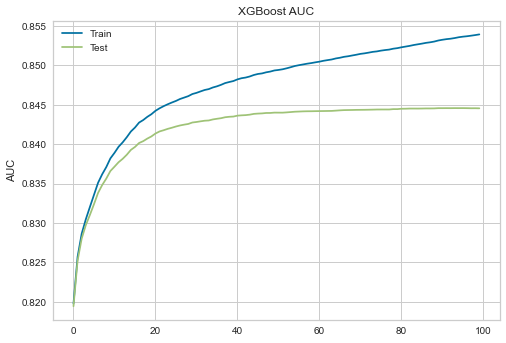

In [74]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [75]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [78]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.61331

In [79]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

0.2869418069610425

In [80]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

0.4101167722435379

In [81]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

0.33764636489196176

In [82]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

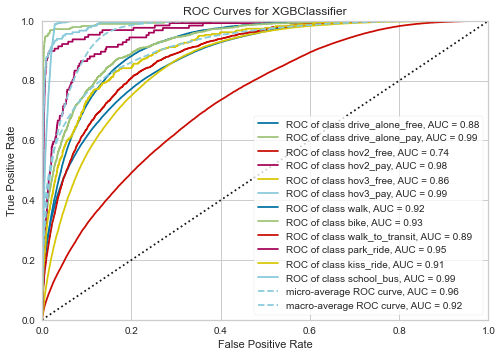

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={0: 'drive_alone_free', 1: 'drive_alone_pay', 2: 'hov2_free',
                3: 'hov2_pay', 4: 'hov3_free', 5: 'hov3_pay', 6: 'walk',
                7: 'bike', 8: 'walk_to_transit', 9: 'park_ride',
                10: 'kiss_ride', 11: 'school_bus'},
       estimator=XGBClassifier(base...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_class=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
     

In [83]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)

In [34]:
# normalized confusion matrix

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
result = []
for i in range(12):
    result.append(cm[i] / cm.astype(np.float).sum(axis=1)[i])
normalizeddf1 = pd.DataFrame(result)
normalizeddf1.columns = ['true Drive Alone Free','true Drive Alone Pay','true HOV2 Free',
                       'true HOV2 Pay', 'true HOV3 Free','true HOV3 Pay','true Walk','true BIKE',
                       'true Walk to Transit', 'true Park and Ride','true Kiss and Ride', 'true School Bus']
normalizeddf1.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [17]:
normalizeddf1

,true Drive Alone Free,true Drive Alone Pay,true HOV2 Free,true HOV2 Pay,true HOV3 Free,true HOV3 Pay,true Walk,true BIKE,true Walk to Transit,true Park and Ride,true Kiss and Ride,true School Bus
pred Drive Alone Free,0.851662,0.000631,0.071541,0.000035,0.052938,0.000175,0.019444,0.001296,0.001962,0.0,0.000035,0.000280
pred Drive Alone Pay,0.605505,0.311927,0.000000,0.036697,0.027523,0.018349,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
pred HOV2 Free,0.387287,0.000060,0.299493,0.000060,0.260400,0.000298,0.041838,0.001015,0.002805,0.0,0.000119,0.006625
pred HOV2 Pay,0.512821,0.076923,0.230769,0.102564,0.025641,0.025641,0.025641,0.000000,0.000000,0.0,0.000000,0.000000
pred HOV3 Free,0.175457,0.000149,0.169960,0.000223,0.603254,0.000297,0.039741,0.000371,0.002228,0.0,0.000000,0.008320
pred HOV3 Pay,0.266667,0.016667,0.166667,0.133333,0.250000,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
pred Walk,0.272202,0.000000,0.132463,0.000000,0.181040,0.000000,0.406591,0.002140,0.001498,0.0,0.000000,0.004066
pred BIKE,0.536779,0.000000,0.103380,0.000000,0.069583,0.000000,0.137177,0.125249,0.007952,0.0,0.000000,0.019881
pred Walk to Transit,0.544132,0.000970,0.151309,0.000000,0.137730,0.000000,0.091174,0.000970,0.067895,0.0,0.002910,0.002910
pred Park and Ride,0.807692,0.019231,0.057692,0.000000,0.019231,0.000000,0.019231,0.000000,0.076923,0.0,0.000000,0.000000


## Feature Importance

In [84]:
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot

In [85]:
print(xgb_model.feature_importances_)

[0.02009101 0.         0.00117496 0.00126654 0.00108386 0.07737122
 0.01106011 0.03578699 0.00778738 0.07319444 0.0420328  0.29765683
 0.02039826 0.01483476 0.         0.01270147 0.         0.03229424
 0.         0.08183055 0.0537815  0.00484464 0.00309299 0.00285083
 0.00773046 0.00228711 0.00213576 0.00314878 0.00186426 0.00460918
 0.07449074 0.         0.00539412 0.00551777 0.00116603 0.00251162
 0.00136118 0.01800077 0.03020154 0.04444528]


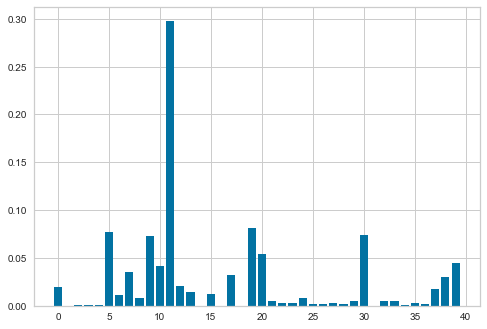

In [86]:
pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

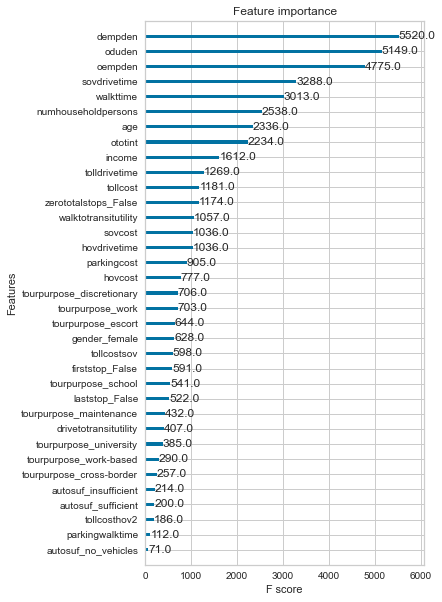

In [87]:
xgb_model.get_booster().feature_names = list(data_encoded.columns)[:-1]
fig, ax = pyplot.subplots(figsize=(5, 10))
plot_importance(xgb_model.get_booster(), ax=ax)
pyplot.show()

# Feature Selection w/ Imbalanced Sample

In [161]:
features = ['dempden','oempden','oduden','sovdrivetime','walkttime','ototint','numhouseholdpersons','age','income',\
            'tolldrivetime','zerototalstops_False','tollcost','walktotransitutility','sovcost','hovdrivetime',\
            'parkingcost','hovcost']

In [162]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

combined_subsamples

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
389395,1,0,0,0,1,0,0,1,0,0,...,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,0
9670948,1,0,1,0,0,0,1,0,0,0,...,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,0
12239774,1,0,0,0,1,0,0,1,0,0,...,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,0
8333334,0,1,0,0,1,0,0,0,0,0,...,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,0
5401543,1,0,1,0,0,0,1,0,0,0,...,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7823492,0,1,0,0,1,0,0,0,0,1,...,0.0,11.730612,-999.0,-999.0,0.0,0.0,51.028160,51.028160,51.028160,11
5479550,0,1,0,0,1,0,0,0,0,1,...,0.0,31.625110,-999.0,-999.0,0.0,0.0,137.569223,137.569223,137.569223,11
8408941,1,0,1,0,0,0,0,0,0,1,...,0.0,3.576696,-999.0,-999.0,0.0,0.0,15.558626,15.558626,15.558626,11
84558,0,1,0,0,1,0,0,0,0,1,...,0.0,25.954766,-999.0,-999.0,0.0,0.0,112.903229,112.903229,112.903229,11


In [164]:
filtered_subsamples = combined_subsamples[features+['targettripmode']]
filtered_subsamples

,dempden,oempden,oduden,sovdrivetime,walkttime,ototint,numhouseholdpersons,age,income,tolldrivetime,zerototalstops_False,tollcost,walktotransitutility,sovcost,hovdrivetime,parkingcost,hovcost,targettripmode
389395,24.913393,27.730175,4.763200,5.347993,8.340726,23.0,1,6,3,5.347993,1,36.282156,-999.0,36.282156,5.347993,0.0,36.282156,0
9670948,31.653795,15.671348,9.224600,2.035063,3.962483,6.0,4,7,4,2.035063,1,17.236800,-999.0,17.236800,2.035063,0.0,17.236800,0
12239774,2.250410,41.898407,17.549500,14.014216,45.059798,13.0,4,6,2,14.014216,0,196.010116,-999.0,196.010116,14.014216,0.0,196.010116,0
8333334,3.054741,33.792797,6.955700,14.571569,48.703855,1.0,2,7,3,14.571569,1,211.861765,-999.0,211.861765,14.571569,0.0,211.861765,0
5401543,6.404369,5.626131,11.696300,6.707609,18.757141,6.0,2,7,1,6.707609,1,81.593560,-999.0,81.593560,6.707609,0.0,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7823492,11.513654,155.832611,3.103200,5.872152,11.730612,11.0,2,2,2,5.872152,0,51.028160,-999.0,51.028160,5.872152,0.0,51.028160,11
5479550,26.882071,35.323082,54.946701,13.605807,31.625110,14.0,3,1,3,13.605807,0,137.569223,-999.0,137.569223,13.605807,0.0,137.569223,11
8408941,75.592186,35.842781,2.370300,1.900102,3.576696,1.0,4,1,3,1.900102,0,15.558626,-999.0,15.558626,1.900102,0.0,15.558626,11
84558,76.096695,56.518261,11.005000,10.980021,25.954766,4.0,4,3,2,10.980021,0,112.903229,-999.0,112.903229,10.980021,0.0,112.903229,11


In [165]:
# rearrange into data array for training

data_array = filtered_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[ 24.91339302  27.73017502   4.76319981 ...   5.34799286   0.
   36.28215597]
 [ 31.65379524  15.67134762   9.22459984 ...   2.03506322   0.
   17.23679992]
 [  2.25041032  41.89840698  17.54949951 ...  14.01421589   0.
  196.01011589]
 ...
 [ 75.59218597  35.84278107   2.37030005 ...   1.90010214   0.
   15.55862638]
 [ 76.09669495  56.51826096  11.00500011 ...  10.98002139   0.
  112.90322948]
 [ 13.09835148  15.2063446    5.69199991 ...   3.53136894   0.
   25.05515397]]
[ 0.  0.  0. ... 11. 11. 11.]


## Model Building

In [166]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [167]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799999, 17)
(200000, 17)
(799999,)
(200000,)


In [168]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12, use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=12, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

## Evaluation

In [169]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.764595,
                0.770296,
                0.773001,
                0.774922,
                0.776153,
                0.7776,
                0.778698,
                0.779799,
                0.780569,
                0.781336,
                0.781964,
                0.782634,
                0.78313,
                0.783662,
                0.784094,
                0.784654,
                0.785111,
                0.785524,
                0.785987,
                0.786297,
                0.786613,
                0.786952,
                0.787283,
                0.78754,
                0.787904,
                0.78818,
                0.788449,
                0.788742,
                0.789047,
                0.789291,
                0.78953,
                0.789826,
                0.79006,
                0.790298,
                0.790541,
                0.790801,
                0.790989,
       

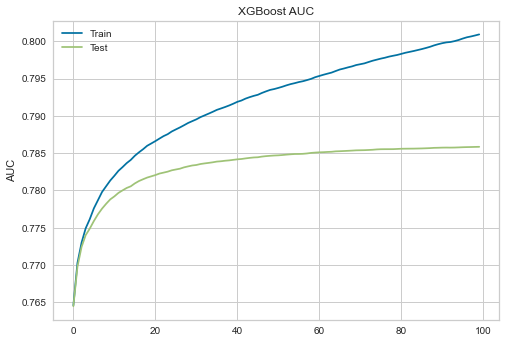

In [170]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [171]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [172]:
# 13*13 confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[79233,    51,  1690,     3,  4963,     7,  1596,    72,   121,
            1,     3,     2],
       [  161,   107,     0,    12,     2,     7,     0,     0,     0,
            0,     0,     0],
       [27982,    15,  6950,     5, 13260,    14,  1677,    17,   103,
            1,     1,   166],
       [   61,    31,     3,     7,    11,    15,     1,     0,     0,
            0,     0,     0],
       [13095,     7,  4019,     6, 21432,    14,  1321,     8,   100,
            1,     0,   246],
       [   52,    27,    13,    19,    44,    28,     0,     0,     0,
            0,     0,     0],
       [ 5249,     0,  1258,     0,  2988,     1,  4687,    25,     8,
            0,     0,    68],
       [  913,     0,   129,     0,   227,     0,   158,   123,     5,
            0,     1,    24],
       [ 1769,     0,   260,     0,   488,     0,   213,     0,   209,
            0,     5,     1],
       [  104,     0,     1,     0,    11,     0,     1,     0,     7,
            0,     2

In [173]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.56613

In [174]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

0.2389605498492141

In [175]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

0.3725442132717613

In [176]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

0.2911616569990683

In [177]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

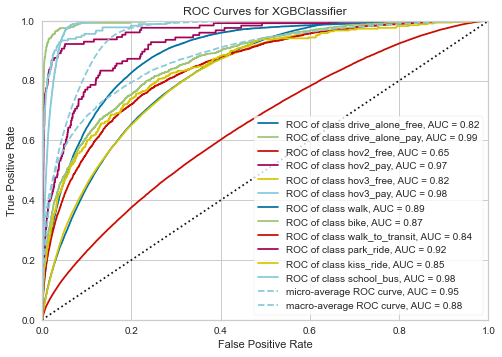

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={0: 'drive_alone_free', 1: 'drive_alone_pay', 2: 'hov2_free',
                3: 'hov2_pay', 4: 'hov3_free', 5: 'hov3_pay', 6: 'walk',
                7: 'bike', 8: 'walk_to_transit', 9: 'park_ride',
                10: 'kiss_ride', 11: 'school_bus'},
       estimator=XGBClassifier(base...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_class=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
     

In [178]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)

# Feature Selection w/ Uniform Sample

In [142]:
# uniform subsample
mode1 = data_encoded[data_encoded['targettripmode']==0].sample(n=9598, random_state=1)
mode2 = data_encoded[data_encoded['targettripmode']==1].sample(n=9598, random_state=1)
mode3 = data_encoded[data_encoded['targettripmode']==2].sample(n=9598, random_state=1)
mode4 = data_encoded[data_encoded['targettripmode']==3].sample(n=9598, random_state=1)
mode5 = data_encoded[data_encoded['targettripmode']==4].sample(n=9598, random_state=1)
mode6 = data_encoded[data_encoded['targettripmode']==5].sample(n=9598, random_state=1)
mode7 = data_encoded[data_encoded['targettripmode']==6].sample(n=9598, random_state=1)
mode8 = data_encoded[data_encoded['targettripmode']==7].sample(n=9598, random_state=1)
mode9 = data_encoded[data_encoded['targettripmode']==8].sample(n=9598, random_state=1)
mode10 = data_encoded[data_encoded['targettripmode']==9].sample(n=9598, random_state=1)
mode11 = data_encoded[data_encoded['targettripmode']==10].sample(n=9598, random_state=1)
mode12 = data_encoded[data_encoded['targettripmode']==11].sample(n=9598, random_state=1)

In [143]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

combined_subsamples

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
389395,1,0,0,0,1,0,0,1,0,0,...,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,0
9670948,1,0,1,0,0,0,1,0,0,0,...,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,0
12239774,1,0,0,0,1,0,0,1,0,0,...,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,0
8333334,0,1,0,0,1,0,0,0,0,0,...,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,0
5401543,1,0,1,0,0,0,1,0,0,0,...,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11634782,1,0,1,0,0,0,0,0,0,1,...,0.0,31.562569,-999.0,-999.0,0.0,0.0,137.297170,137.297170,137.297170,11
7686149,1,0,0,0,1,0,0,0,0,1,...,0.0,4.946384,-999.0,-999.0,0.0,0.0,21.516769,21.516769,21.516769,11
834707,0,1,1,0,0,0,0,0,0,1,...,0.0,42.958368,-999.0,-999.0,0.0,0.0,186.868895,186.868895,186.868895,11
897023,0,1,1,0,0,0,0,0,0,1,...,0.0,20.089798,-999.0,-999.0,0.0,0.0,87.390619,87.390619,87.390619,11


In [144]:
filtered_subsamples = combined_subsamples[features+['targettripmode']]
filtered_subsamples

,dempden,oempden,oduden,sovdrivetime,walkttime,ototint,numhouseholdpersons,age,income,tolldrivetime,zerototalstops_False,tollcost,walktotransitutility,sovcost,hovdrivetime,parkingcost,hovcost,targettripmode
389395,24.913393,27.730175,4.7632,5.347993,8.340726,23.0,1,6,3,5.347993,1,36.282156,-999.0,36.282156,5.347993,0.0,36.282156,0
9670948,31.653795,15.671348,9.2246,2.035063,3.962483,6.0,4,7,4,2.035063,1,17.236800,-999.0,17.236800,2.035063,0.0,17.236800,0
12239774,2.250410,41.898407,17.5495,14.014216,45.059798,13.0,4,6,2,14.014216,0,196.010116,-999.0,196.010116,14.014216,0.0,196.010116,0
8333334,3.054741,33.792797,6.9557,14.571569,48.703855,1.0,2,7,3,14.571569,1,211.861765,-999.0,211.861765,14.571569,0.0,211.861765,0
5401543,6.404369,5.626131,11.6963,6.707609,18.757141,6.0,2,7,1,6.707609,1,81.593560,-999.0,81.593560,6.707609,0.0,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11634782,35.274147,89.992142,19.2806,12.902653,31.562569,13.0,5,3,2,12.902653,0,137.297170,-999.0,137.297170,12.902653,0.0,137.297170,11
7686149,68.080734,32.701839,13.2404,3.022979,4.946384,4.0,2,1,4,3.022979,0,21.516769,-999.0,21.516769,3.022979,0.0,21.516769,11
834707,76.096695,23.274353,14.2458,15.924461,42.958368,4.0,4,3,2,15.924461,0,186.868895,-999.0,186.868895,15.924461,0.0,186.868895,11
897023,22.759573,59.490776,9.0111,8.108419,20.089798,3.0,6,1,3,8.108419,0,87.390619,-999.0,87.390619,8.108419,0.0,87.390619,11


In [145]:
# rearrange into data array for training

data_array = filtered_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[ 24.91339302  27.73017502   4.76319981 ...   5.34799286   0.
   36.28215597]
 [ 31.65379524  15.67134762   9.22459984 ...   2.03506322   0.
   17.23679992]
 [  2.25041032  41.89840698  17.54949951 ...  14.01421589   0.
  196.01011589]
 ...
 [ 76.09669495  23.27435303  14.24580002 ...  15.92446107   0.
  186.86889542]
 [ 22.75957298  59.49077606   9.01109982 ...   8.10841851   0.
   87.39061899]
 [ 19.20018578 170.8591156   13.01500034 ...  17.44254763   0.
  215.90281039]]
[ 0.  0.  0. ... 11. 11. 11.]


## Model Building

In [146]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [147]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92140, 17)
(23036, 17)
(92140,)
(23036,)


In [148]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12, use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=12, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

## Evaluation

In [149]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.865658,
                0.875224,
                0.880438,
                0.883565,
                0.886472,
                0.889012,
                0.890827,
                0.892893,
                0.894635,
                0.896362,
                0.897754,
                0.899072,
                0.900312,
                0.901374,
                0.902629,
                0.903615,
                0.904685,
                0.905683,
                0.906648,
                0.907495,
                0.908442,
                0.909194,
                0.910099,
                0.910893,
                0.911629,
                0.912353,
                0.913152,
                0.913905,
                0.914654,
                0.915338,
                0.915926,
                0.916561,
                0.917208,
                0.917872,
                0.918563,
                0.919141,
                0.919687,


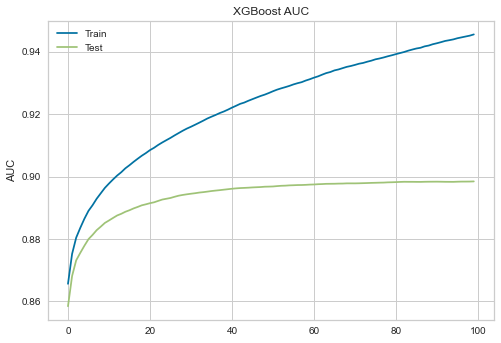

In [150]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [151]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [152]:
# 13*13 confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 863,   33,  103,   31,  177,   26,  193,  137,  112,  153,  105,
          13],
       [  21, 1288,    2,  356,    4,  223,    4,    0,    1,   22,    2,
           0],
       [ 404,   13,  174,   19,  431,   39,  253,  113,  126,  105,   96,
         134],
       [  28,  677,   13,  696,   29,  482,   11,    2,    7,   17,    7,
           3],
       [ 156,    4,  114,   14,  842,   49,  227,   77,  156,   53,   65,
         144],
       [  10,  383,    9,  451,   44, 1043,   10,    2,    3,   16,    5,
          14],
       [  94,    0,   51,    4,  178,   15, 1073,  198,  150,   15,   10,
         136],
       [ 170,    2,   55,    3,  121,    3,  239,  919,  128,   89,   82,
         104],
       [ 181,    8,   58,    9,  152,   10,  228,   99,  634,  249,  239,
          44],
       [ 147,   23,   21,   24,   39,   18,   41,   65,   99, 1043,  357,
          14],
       [ 129,   18,   42,   19,  125,   21,   58,   84,  165,  514,  612,
         104],
       [   0,    0,  

In [153]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.4728251432540372

In [154]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

0.47360405801944205

In [155]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

0.4553456055018654

In [156]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

0.4642953973405621

In [157]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

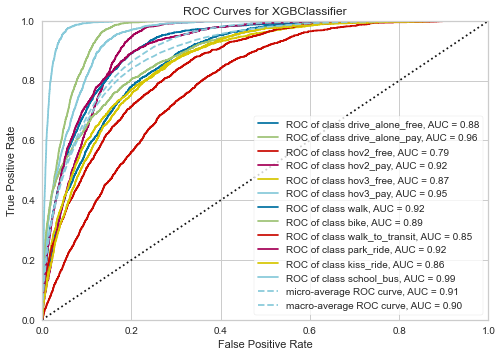

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={0: 'drive_alone_free', 1: 'drive_alone_pay', 2: 'hov2_free',
                3: 'hov2_pay', 4: 'hov3_free', 5: 'hov3_pay', 6: 'walk',
                7: 'bike', 8: 'walk_to_transit', 9: 'park_ride',
                10: 'kiss_ride', 11: 'school_bus'},
       estimator=XGBClassifier(base...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_class=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
     

In [158]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)

# All Features w Uniform Sample

In [179]:
# uniform subsample
mode1 = data_encoded[data_encoded['targettripmode']==0].sample(n=9598, random_state=1)
mode2 = data_encoded[data_encoded['targettripmode']==1].sample(n=9598, random_state=1)
mode3 = data_encoded[data_encoded['targettripmode']==2].sample(n=9598, random_state=1)
mode4 = data_encoded[data_encoded['targettripmode']==3].sample(n=9598, random_state=1)
mode5 = data_encoded[data_encoded['targettripmode']==4].sample(n=9598, random_state=1)
mode6 = data_encoded[data_encoded['targettripmode']==5].sample(n=9598, random_state=1)
mode7 = data_encoded[data_encoded['targettripmode']==6].sample(n=9598, random_state=1)
mode8 = data_encoded[data_encoded['targettripmode']==7].sample(n=9598, random_state=1)
mode9 = data_encoded[data_encoded['targettripmode']==8].sample(n=9598, random_state=1)
mode10 = data_encoded[data_encoded['targettripmode']==9].sample(n=9598, random_state=1)
mode11 = data_encoded[data_encoded['targettripmode']==10].sample(n=9598, random_state=1)
mode12 = data_encoded[data_encoded['targettripmode']==11].sample(n=9598, random_state=1)

In [180]:
combined_subsamples = pd.concat([mode1,mode2,mode3,mode4,mode5,mode6,mode7,mode8,mode9,mode10,mode11,mode12], axis=0)

combined_subsamples

,gender_female,gender_male,autosuf_insufficient,autosuf_no_vehicles,autosuf_sufficient,tourpurpose_cross-border,tourpurpose_discretionary,tourpurpose_escort,tourpurpose_maintenance,tourpurpose_school,...,tollcosthov3,walkttime,walktotransitutility,drivetotransitutility,parkingcost,parkingwalktime,sovcost,hovcost,tollcost,targettripmode
389395,1,0,0,0,1,0,0,1,0,0,...,0.0,8.340726,-999.0,-999.0,0.0,0.0,36.282156,36.282156,36.282156,0
9670948,1,0,1,0,0,0,1,0,0,0,...,0.0,3.962483,-999.0,-999.0,0.0,0.0,17.236800,17.236800,17.236800,0
12239774,1,0,0,0,1,0,0,1,0,0,...,0.0,45.059798,-999.0,-999.0,0.0,0.0,196.010116,196.010116,196.010116,0
8333334,0,1,0,0,1,0,0,0,0,0,...,0.0,48.703855,-999.0,-999.0,0.0,0.0,211.861765,211.861765,211.861765,0
5401543,1,0,1,0,0,0,1,0,0,0,...,0.0,18.757141,-999.0,-999.0,0.0,0.0,81.593560,81.593560,81.593560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11634782,1,0,1,0,0,0,0,0,0,1,...,0.0,31.562569,-999.0,-999.0,0.0,0.0,137.297170,137.297170,137.297170,11
7686149,1,0,0,0,1,0,0,0,0,1,...,0.0,4.946384,-999.0,-999.0,0.0,0.0,21.516769,21.516769,21.516769,11
834707,0,1,1,0,0,0,0,0,0,1,...,0.0,42.958368,-999.0,-999.0,0.0,0.0,186.868895,186.868895,186.868895,11
897023,0,1,1,0,0,0,0,0,0,1,...,0.0,20.089798,-999.0,-999.0,0.0,0.0,87.390619,87.390619,87.390619,11


In [181]:
# rearrange into data array for training

data_array = combined_subsamples.values

X = data_array[:, 0:(data_array.shape[1]-1)]
Y = data_array[:,(data_array.shape[1]-1)]
print(X)
print(Y)

[[  1.           0.           0.         ...  36.28215597  36.28215597
   36.28215597]
 [  1.           0.           1.         ...  17.23679992  17.23679992
   17.23679992]
 [  1.           0.           0.         ... 196.01011589 196.01011589
  196.01011589]
 ...
 [  0.           1.           1.         ... 186.86889542 186.86889542
  186.86889542]
 [  0.           1.           1.         ...  87.39061899  87.39061899
   87.39061899]
 [  1.           0.           1.         ... 215.90281039 215.90281039
  215.90281039]]
[ 0.  0.  0. ... 11. 11. 11.]


## Model Building

In [182]:
# split into train and test sets 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [183]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(92140, 40)
(23036, 40)
(92140,)
(23036,)


In [184]:
# build xgboost classifier for multiclassification
xgb_model = XGBClassifier(objective='multi:softprob',eval_metric='auc',num_class=12, use_label_encoder=False)
xgb_model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],verbose=0)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=12, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

## Evaluation

In [185]:
xgb_model.evals_result()

{'validation_0': OrderedDict([('auc',
               [0.902835,
                0.910029,
                0.913958,
                0.916508,
                0.918597,
                0.920023,
                0.921426,
                0.922524,
                0.923711,
                0.924649,
                0.925547,
                0.92641,
                0.927119,
                0.927986,
                0.928697,
                0.929319,
                0.929996,
                0.930557,
                0.931116,
                0.931651,
                0.932173,
                0.932794,
                0.933213,
                0.933699,
                0.934068,
                0.934595,
                0.935024,
                0.935502,
                0.935892,
                0.936408,
                0.936799,
                0.937343,
                0.937819,
                0.938276,
                0.938571,
                0.938964,
                0.939475,
 

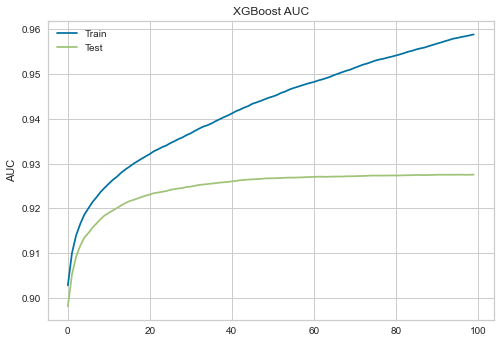

In [186]:
# plot training and teating accuracies 

import matplotlib.pyplot as plt
results = xgb_model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis,results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [187]:
y_pred = xgb_model.predict(X_test) 
y_pred = [round(value) for value in y_pred]

In [188]:
# 13*13 confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[ 905,   17,  192,   15,  118,   13,  122,  154,  108,  204,   95,
           3],
       [  30, 1367,    3,  365,    3,  132,    6,    1,    0,   15,    1,
           0],
       [ 271,    2,  448,   19,  464,   20,  224,   80,  122,   60,   96,
         101],
       [  16,  423,   23,  901,   20,  542,   16,    4,    2,   11,   12,
           2],
       [  77,    0,  181,    5,  994,   27,  210,   43,  117,   35,  115,
          97],
       [   4,  151,    4,  442,   44, 1301,   12,    2,    2,   14,    6,
           8],
       [  74,    3,   79,    3,  170,   15, 1122,  182,  138,    9,   38,
          91],
       [ 143,    0,   43,    1,   62,    3,  180, 1129,  107,  113,   44,
          90],
       [ 148,    2,   44,    7,  109,    9,  198,  142,  651,  316,  234,
          51],
       [ 100,   19,   13,   15,   15,    4,   30,   96,  100, 1245,  254,
           0],
       [  85,    9,   45,   15,  115,   15,   72,   53,  131,  496,  765,
          90],
       [   0,    0,  

In [189]:
# accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.5484459107483938

In [190]:
# sensitivity
sensitivity = metrics.recall_score(y_test, y_pred, average = 'macro')
sensitivity

0.5490889043536745

In [191]:
# precision
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
precision

0.5376458028689389

In [192]:
# F1-score
f1 = (2 * precision * sensitivity) / (precision + sensitivity)
f1

0.5433071068138503

In [193]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'drive_alone_free', 
                                        1: 'drive_alone_pay', 
                                        2: 'hov2_free',
                                        3: 'hov2_pay',
                                        4: 'hov3_free',
                                        5: 'hov3_pay',
                                        6: 'walk',
                                        7: 'bike',
                                        8: 'walk_to_transit',
                                        9: 'park_ride',
                                        10: 'kiss_ride',
                                        11: 'school_bus'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

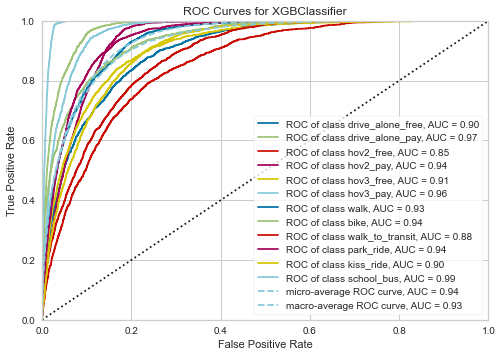

/usr/local/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={0: 'drive_alone_free', 1: 'drive_alone_pay', 2: 'hov2_free',
                3: 'hov2_pay', 4: 'hov3_free', 5: 'hov3_pay', 6: 'walk',
                7: 'bike', 8: 'walk_to_transit', 9: 'park_ride',
                10: 'kiss_ride', 11: 'school_bus'},
       estimator=XGBClassifier(base...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_class=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
     

In [194]:
plot_ROC_curve(xgb_model, X_train, y_train, X_test, y_test)

# Income Group Evaluation

In [157]:
middle_list = [x==3 for x in new_utilityvars['income'].values]

In [158]:
from itertools import compress

In [159]:
y_pred_middle = list(compress(y_pred, middle_list))
y_test_middle = list(compress(y_test, middle_list))

In [160]:
# multilabel confusion matrix for middle income group
metrics.multilabel_confusion_matrix(y_test_middle, y_pred_middle)

array([[[777,  49],
        [ 31,  33]],

       [[779,  33],
        [ 23,  55]],

       [[772,  33],
        [ 65,  20]],

       [[764,  43],
        [ 49,  34]],

       [[767,  43],
        [ 48,  32]],

       [[783,  31],
        [ 35,  41]],

       [[775,  45],
        [ 42,  28]],

       [[801,  24],
        [ 36,  29]],

       [[774,  38],
        [ 55,  23]],

       [[767,  54],
        [ 33,  36]],

       [[786,  44],
        [ 37,  23]],

       [[783,  25],
        [  8,  74]]])

In [161]:
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_middle, y_pred_middle)
matrix_0

array([[33,  2,  6,  0,  4,  0,  2,  3,  3,  8,  3,  0],
       [ 1, 55,  0, 19,  0,  3,  0,  0,  0,  0,  0,  0],
       [14,  0, 20,  1, 19,  0,  6,  2,  6,  0,  9,  8],
       [ 1, 23,  0, 34,  0, 23,  1,  0,  1,  0,  0,  0],
       [ 4,  0, 11,  1, 32,  2, 12,  2,  3,  2,  7,  4],
       [ 2,  6,  1, 19,  1, 41,  1,  0,  0,  2,  2,  1],
       [ 6,  0,  6,  1,  9,  0, 28,  5,  8,  0,  1,  6],
       [ 5,  1,  3,  0,  3,  0,  8, 29,  9,  4,  1,  2],
       [ 9,  0,  3,  0,  3,  1, 10,  3, 23, 17,  7,  2],
       [ 7,  1,  1,  1,  0,  1,  2,  4,  3, 36, 13,  0],
       [ 0,  0,  1,  1,  4,  1,  2,  1,  4, 21, 23,  2],
       [ 0,  0,  1,  0,  0,  0,  1,  4,  1,  0,  1, 74]])

In [162]:
normalized_matrix_middle = metrics.confusion_matrix(y_test_middle, y_pred_middle)/ metrics.confusion_matrix(y_test_middle, y_pred_middle).astype(np.float).sum(axis=1)
normalized_matrix_middle

array([[0.515625  , 0.02564103, 0.07058824, 0.        , 0.05      ,
        0.        , 0.02857143, 0.04615385, 0.03846154, 0.11594203,
        0.05      , 0.        ],
       [0.015625  , 0.70512821, 0.        , 0.22891566, 0.        ,
        0.03947368, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.21875   , 0.        , 0.23529412, 0.01204819, 0.2375    ,
        0.        , 0.08571429, 0.03076923, 0.07692308, 0.        ,
        0.15      , 0.09756098],
       [0.015625  , 0.29487179, 0.        , 0.40963855, 0.        ,
        0.30263158, 0.01428571, 0.        , 0.01282051, 0.        ,
        0.        , 0.        ],
       [0.0625    , 0.        , 0.12941176, 0.01204819, 0.4       ,
        0.02631579, 0.17142857, 0.03076923, 0.03846154, 0.02898551,
        0.11666667, 0.04878049],
       [0.03125   , 0.07692308, 0.01176471, 0.22891566, 0.0125    ,
        0.53947368, 0.01428571, 0.        , 0.        , 0.02898551,
        0.03333333,

In [163]:
normalizeddf_middle = pd.DataFrame(
    metrics.confusion_matrix(y_test_middle, y_pred_middle)/ metrics.confusion_matrix(y_test_middle, y_pred_middle).astype(np.float).sum(axis=1))

In [164]:
normalizeddf_middle.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_middle.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [165]:
normalizeddf_middle

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.515625,0.025641,0.070588,0.000000,0.0500,0.000000,0.028571,0.046154,0.038462,0.115942,0.050000,0.000000
pred Drive Alone Pay,0.015625,0.705128,0.000000,0.228916,0.0000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pred HOV2 Free,0.218750,0.000000,0.235294,0.012048,0.2375,0.000000,0.085714,0.030769,0.076923,0.000000,0.150000,0.097561
pred HOV2 Pay,0.015625,0.294872,0.000000,0.409639,0.0000,0.302632,0.014286,0.000000,0.012821,0.000000,0.000000,0.000000
pred HOV3 Free,0.062500,0.000000,0.129412,0.012048,0.4000,0.026316,0.171429,0.030769,0.038462,0.028986,0.116667,0.048780
pred HOV3 Pay,0.031250,0.076923,0.011765,0.228916,0.0125,0.539474,0.014286,0.000000,0.000000,0.028986,0.033333,0.012195
pred Walk,0.093750,0.000000,0.070588,0.012048,0.1125,0.000000,0.400000,0.076923,0.102564,0.000000,0.016667,0.073171
pred BIKE,0.078125,0.012821,0.035294,0.000000,0.0375,0.000000,0.114286,0.446154,0.115385,0.057971,0.016667,0.024390
pred Walk to Transit,0.140625,0.000000,0.035294,0.000000,0.0375,0.013158,0.142857,0.046154,0.294872,0.246377,0.116667,0.024390
pred Park and Ride,0.109375,0.012821,0.011765,0.012048,0.0000,0.013158,0.028571,0.061538,0.038462,0.521739,0.216667,0.000000


In [169]:
accuracy_df_middle = pd.DataFrame(normalized_matrix_middle.diagonal()/normalized_matrix_middle.sum(axis=1))

In [170]:
accuracy_df_middle.index = travel_names

<AxesSubplot:>

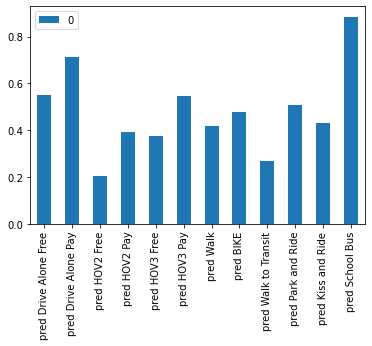

In [171]:
accuracy_df_middle.plot(kind='bar')

In [175]:
low_list = [x==1 or x==2 for x in new_utilityvars['income'].values]

In [176]:
y_pred_low = list(compress(y_pred, low_list))
y_test_low = list(compress(y_test, low_list))

In [177]:
metrics.multilabel_confusion_matrix(y_test_low, y_pred_low)

array([[[892,  64],
        [ 44,  31]],

       [[923,  29],
        [ 27,  52]],

       [[888,  47],
        [ 76,  20]],

       [[913,  31],
        [ 61,  26]],

       [[890,  52],
        [ 52,  37]],

       [[900,  47],
        [ 27,  57]],

       [[889,  50],
        [ 47,  45]],

       [[911,  34],
        [ 36,  50]],

       [[896,  43],
        [ 72,  20]],

       [[891,  55],
        [ 30,  55]],

       [[896,  49],
        [ 51,  35]],

       [[926,  25],
        [  3,  77]]])

In [178]:
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_low, y_pred_low)
matrix_0

array([[31,  0, 11,  0,  9,  1,  7,  4,  4,  7,  1,  0],
       [ 0, 52,  0, 16,  0, 11,  0,  0,  0,  0,  0,  0],
       [18,  0, 20,  1, 24,  0, 11,  3,  7,  4,  5,  3],
       [ 3, 19,  1, 26,  1, 30,  1,  0,  0,  5,  1,  0],
       [ 8,  1, 20,  0, 37,  0,  5,  1,  4,  2,  7,  4],
       [ 1,  8,  1,  9,  2, 57,  1,  0,  1,  1,  2,  1],
       [ 7,  0,  7,  1,  6,  2, 45, 13,  5,  0,  2,  4],
       [ 9,  0,  2,  1,  1,  0, 12, 50,  4,  2,  2,  3],
       [10,  0,  3,  0,  4,  0, 10,  8, 20, 18, 14,  5],
       [ 3,  1,  0,  0,  1,  1,  3,  3,  6, 55, 12,  0],
       [ 5,  0,  2,  3,  4,  2,  0,  2, 12, 16, 35,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 77]])

In [179]:
normalized_matrix_low = metrics.confusion_matrix(y_test_low, y_pred_low)/ metrics.confusion_matrix(y_test_low, y_pred_low).astype(np.float).sum(axis=1)
normalized_matrix_low

array([[0.41333333, 0.        , 0.11458333, 0.        , 0.1011236 ,
        0.01190476, 0.07608696, 0.04651163, 0.04347826, 0.08235294,
        0.01162791, 0.        ],
       [0.        , 0.65822785, 0.        , 0.18390805, 0.        ,
        0.13095238, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.24      , 0.        , 0.20833333, 0.01149425, 0.26966292,
        0.        , 0.11956522, 0.03488372, 0.07608696, 0.04705882,
        0.05813953, 0.0375    ],
       [0.04      , 0.24050633, 0.01041667, 0.29885057, 0.01123596,
        0.35714286, 0.01086957, 0.        , 0.        , 0.05882353,
        0.01162791, 0.        ],
       [0.10666667, 0.01265823, 0.20833333, 0.        , 0.41573034,
        0.        , 0.05434783, 0.01162791, 0.04347826, 0.02352941,
        0.08139535, 0.05      ],
       [0.01333333, 0.10126582, 0.01041667, 0.10344828, 0.02247191,
        0.67857143, 0.01086957, 0.        , 0.01086957, 0.01176471,
        0.02325581,

In [180]:
normalizeddf_low = pd.DataFrame(
    metrics.confusion_matrix(y_test_low, y_pred_low)/ metrics.confusion_matrix(y_test_low, y_pred_low).astype(np.float).sum(axis=1))

In [181]:
normalizeddf_low.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_low.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [182]:
normalizeddf_low

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.413333,0.000000,0.114583,0.000000,0.101124,0.011905,0.076087,0.046512,0.043478,0.082353,0.011628,0.0000
pred Drive Alone Pay,0.000000,0.658228,0.000000,0.183908,0.000000,0.130952,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
pred HOV2 Free,0.240000,0.000000,0.208333,0.011494,0.269663,0.000000,0.119565,0.034884,0.076087,0.047059,0.058140,0.0375
pred HOV2 Pay,0.040000,0.240506,0.010417,0.298851,0.011236,0.357143,0.010870,0.000000,0.000000,0.058824,0.011628,0.0000
pred HOV3 Free,0.106667,0.012658,0.208333,0.000000,0.415730,0.000000,0.054348,0.011628,0.043478,0.023529,0.081395,0.0500
pred HOV3 Pay,0.013333,0.101266,0.010417,0.103448,0.022472,0.678571,0.010870,0.000000,0.010870,0.011765,0.023256,0.0125
pred Walk,0.093333,0.000000,0.072917,0.011494,0.067416,0.023810,0.489130,0.151163,0.054348,0.000000,0.023256,0.0500
pred BIKE,0.120000,0.000000,0.020833,0.011494,0.011236,0.000000,0.130435,0.581395,0.043478,0.023529,0.023256,0.0375
pred Walk to Transit,0.133333,0.000000,0.031250,0.000000,0.044944,0.000000,0.108696,0.093023,0.217391,0.211765,0.162791,0.0625
pred Park and Ride,0.040000,0.012658,0.000000,0.000000,0.011236,0.011905,0.032609,0.034884,0.065217,0.647059,0.139535,0.0000


In [183]:
accuracy_df_low = pd.DataFrame(normalized_matrix_low.diagonal()/normalized_matrix_low.sum(axis=1))
accuracy_df_low.index = travel_names

<AxesSubplot:>

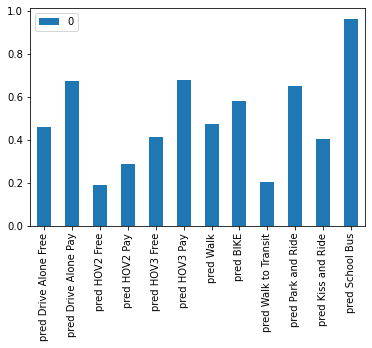

In [184]:
accuracy_df_low.plot(kind='bar')

In [185]:
# for high income
high_list = [x==4 or x==5 for x in new_utilityvars['income'].values]

In [186]:
y_pred_high = list(compress(y_pred, high_list))
y_test_high = list(compress(y_test, high_list))

In [187]:
metrics.multilabel_confusion_matrix(y_test_high, y_pred_high)
# 13*13 confusion matrix
matrix_0 = metrics.confusion_matrix(y_test_high, y_pred_high)
matrix_0

array([[ 82,   0,  19,   2,  16,   0,  17,  17,   7,  23,   8,   0],
       [  2, 103,   0,  32,   1,  15,   0,   0,   1,   3,   0,   0],
       [ 23,   1,  37,   1,  41,   3,  19,   5,   8,   5,   9,   7],
       [  2,  52,   3,  61,   2,  43,   1,   0,   1,   1,   0,   1],
       [  6,   0,  28,   2,  76,   6,  21,   4,   9,   4,   7,   8],
       [  0,  21,   5,  50,   6,  92,   0,   0,   0,   1,   2,   1],
       [  7,   1,  13,   0,   8,   1,  91,  20,  14,   1,   5,   9],
       [ 13,   0,   5,   0,   6,   1,  25,  87,   7,  10,   4,   6],
       [ 15,   1,   9,   0,   5,   0,  17,  10,  56,  33,  17,   8],
       [ 10,   1,   2,   2,   1,   4,   4,  11,  13,  91,  31,   0],
       [ 10,   1,   8,   2,  13,   2,   7,   4,  16,  35,  64,  10],
       [  0,   0,   1,   0,   0,   0,   1,   3,   0,   0,   0, 164]])

In [188]:
normalized_matrix_high = metrics.confusion_matrix(y_test_high, y_pred_high)/ metrics.confusion_matrix(y_test_high, y_pred_high).astype(np.float).sum(axis=1)
normalized_matrix_high

array([[0.42931937, 0.        , 0.11949686, 0.01197605, 0.09356725,
        0.        , 0.1       , 0.10365854, 0.04093567, 0.13529412,
        0.04651163, 0.        ],
       [0.0104712 , 0.65605096, 0.        , 0.19161677, 0.00584795,
        0.08426966, 0.        , 0.        , 0.00584795, 0.01764706,
        0.        , 0.        ],
       [0.12041885, 0.00636943, 0.2327044 , 0.00598802, 0.23976608,
        0.01685393, 0.11176471, 0.0304878 , 0.04678363, 0.02941176,
        0.05232558, 0.04142012],
       [0.0104712 , 0.33121019, 0.01886792, 0.36526946, 0.01169591,
        0.24157303, 0.00588235, 0.        , 0.00584795, 0.00588235,
        0.        , 0.00591716],
       [0.03141361, 0.        , 0.17610063, 0.01197605, 0.44444444,
        0.03370787, 0.12352941, 0.02439024, 0.05263158, 0.02352941,
        0.04069767, 0.04733728],
       [0.        , 0.13375796, 0.03144654, 0.2994012 , 0.03508772,
        0.51685393, 0.        , 0.        , 0.        , 0.00588235,
        0.01162791,

In [189]:
normalizeddf_high = pd.DataFrame(
    metrics.confusion_matrix(y_test_high, y_pred_high)/ metrics.confusion_matrix(y_test_high, y_pred_high).astype(np.float).sum(axis=1))

normalizeddf_high.columns = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']
normalizeddf_high.index = ['pred Drive Alone Free','pred Drive Alone Pay','pred HOV2 Free',
                       'pred HOV2 Pay', 'pred HOV3 Free','pred HOV3 Pay','pred Walk','pred BIKE',
                       'pred Walk to Transit', 'pred Park and Ride','pred Kiss and Ride', 'pred School Bus']

In [190]:
normalizeddf_high

,pred Drive Alone Free,pred Drive Alone Pay,pred HOV2 Free,pred HOV2 Pay,pred HOV3 Free,pred HOV3 Pay,pred Walk,pred BIKE,pred Walk to Transit,pred Park and Ride,pred Kiss and Ride,pred School Bus
pred Drive Alone Free,0.429319,0.000000,0.119497,0.011976,0.093567,0.000000,0.100000,0.103659,0.040936,0.135294,0.046512,0.000000
pred Drive Alone Pay,0.010471,0.656051,0.000000,0.191617,0.005848,0.084270,0.000000,0.000000,0.005848,0.017647,0.000000,0.000000
pred HOV2 Free,0.120419,0.006369,0.232704,0.005988,0.239766,0.016854,0.111765,0.030488,0.046784,0.029412,0.052326,0.041420
pred HOV2 Pay,0.010471,0.331210,0.018868,0.365269,0.011696,0.241573,0.005882,0.000000,0.005848,0.005882,0.000000,0.005917
pred HOV3 Free,0.031414,0.000000,0.176101,0.011976,0.444444,0.033708,0.123529,0.024390,0.052632,0.023529,0.040698,0.047337
pred HOV3 Pay,0.000000,0.133758,0.031447,0.299401,0.035088,0.516854,0.000000,0.000000,0.000000,0.005882,0.011628,0.005917
pred Walk,0.036649,0.006369,0.081761,0.000000,0.046784,0.005618,0.535294,0.121951,0.081871,0.005882,0.029070,0.053254
pred BIKE,0.068063,0.000000,0.031447,0.000000,0.035088,0.005618,0.147059,0.530488,0.040936,0.058824,0.023256,0.035503
pred Walk to Transit,0.078534,0.006369,0.056604,0.000000,0.029240,0.000000,0.100000,0.060976,0.327485,0.194118,0.098837,0.047337
pred Park and Ride,0.052356,0.006369,0.012579,0.011976,0.005848,0.022472,0.023529,0.067073,0.076023,0.535294,0.180233,0.000000


In [191]:
accuracy_df_high = pd.DataFrame(normalized_matrix_high.diagonal()/normalized_matrix_high.sum(axis=1))
accuracy_df_high.index = travel_names

<AxesSubplot:>

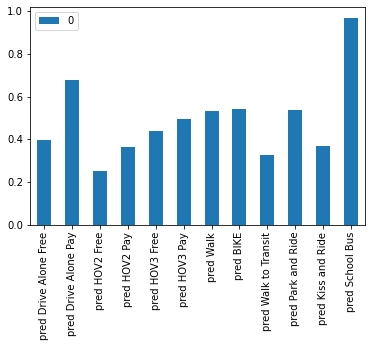

In [192]:
accuracy_df_high.plot(kind='bar')